In [1]:
# packages
import os
from functools import reduce
from hsML import Hamiltonian, En_h, h, c, constants_info, mu_me, get_qd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['axes.formatter.useoffset'] = False

In [5]:
# construct matrix
n_min = 30
n_max = 32
S = 1
ham0 = Hamiltonian(n_min=n_min, n_max=n_max, S=S, ML_max=4)
print('Number of basis states:', '%d'%ham0.num_states)

Number of basis states: 777


In [6]:
# calculate Stark map
Bfield=0.0
Efield_angle=0.0
Efield = np.linspace(0.0, 8.0*10**1, 101) # V /cm
sm0 = ham0.stark_map(Efield*1e2, Bfield=Bfield, 
                     Efield_angle=Efield_angle, 
                     cache_matrices=False,
                     load_matrices=False,
                     save_matrices=False,
                     matrices_dir='./saved_matrices/')

calculate Stark terms:   2%|▏         | 16/777 [00:00<00:04, 152.46it/s]

Field orientation: parallel
$M_L$ sub-manifolds are diagonalised collectively (TODO: should be done independently)


diagonalise Hamiltonian: 100%|██████████| 101/101 [00:08<00:00, 12.21it/s]


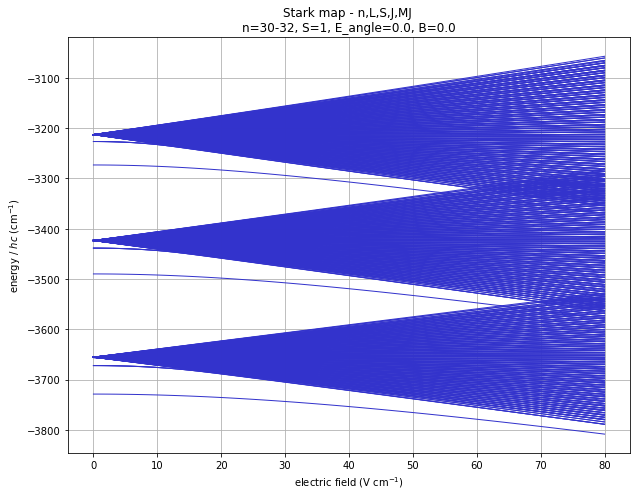

In [7]:
fig, ax = plt.subplots(figsize=(9, 7))

indexes = range(ham0.num_states)
for ix in indexes:
    ax.plot(Efield, sm0[:, ix] / (h*mu_me*10**9), ls='-', lw=1.0, alpha=1, c=(0.2, 0.2, 0.8))

# format
ax.set_xlabel('electric field (V cm$^{-1}$)')
ax.set_ylabel('energy / $h c$ (cm$^{-1}$)')
#ax.set_xlim(350000, 600000)
#ax.set_ylim(-33000, -32800)

# output
plt.grid()
plt.title('Stark map - n,L,S,J,MJ \n' + \
          'n='+str(n_min)+'-'+str(n_max)+ ', ' + \
          'S=' + str(S) + ', ' + \
          'E_angle='+str(Efield_angle) + ', ' + \
          'B='+str(Bfield))
plt.tight_layout()